# Read the house prices dataset 

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

**Read your dataset into a dataframe**

In [3]:
priceDf = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

**Display the first five rows**

In [4]:
priceDf.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Summary of the dataset**

In [5]:
priceDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Explore the target random variable 

**Select the target column to explore it**

In [6]:
target = priceDf['SalePrice']

In [7]:
target.head(5)

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

**Explore the distribution of the target**

<AxesSubplot:ylabel='Frequency'>

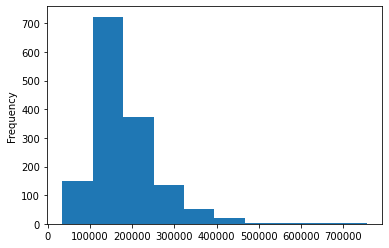

In [8]:
target.plot.hist()

<AxesSubplot:ylabel='Frequency'>

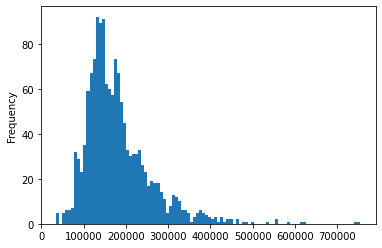

In [9]:
target.plot.hist(bins=100)

**Another method**

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

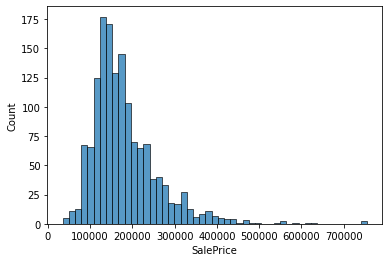

In [10]:
import seaborn as sns
sns.histplot(target)

<AxesSubplot:xlabel='SalePrice', ylabel='Probability'>

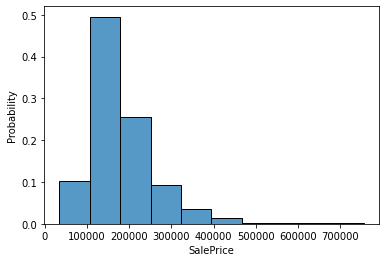

In [32]:
sns.histplot(target, bins= 10, stat='probability')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

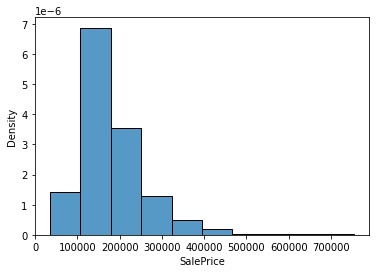

In [33]:
# the density sum of areas (sum (width of each bar * height) should be 1
sns.histplot(target, bins= 10, stat='density')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

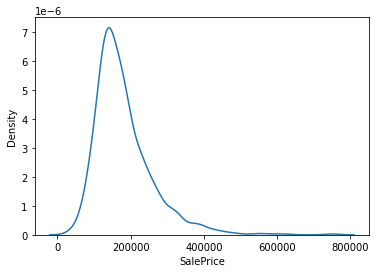

In [12]:
# Let's use kernel density estimation (kde) - univariate (look into one variable) plot 
sns.kdeplot(target)

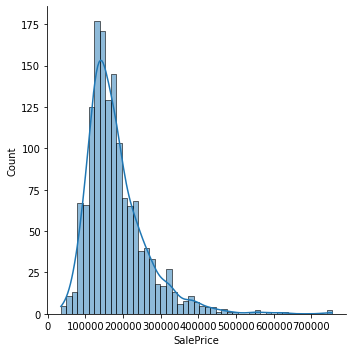

In [21]:
sns.displot(target, kde=True)

# **Expectation of the target variable**

In [14]:
target.mean()

180921.19589041095

# Joint Probability Distribution

**Let's study more than one variable (two variables)**

**First, let's check the distribution of the second variable**

In [15]:
# read the variable
bedrooms = priceDf['BedroomAbvGr']

<AxesSubplot:ylabel='Frequency'>

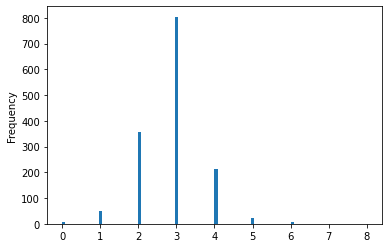

In [16]:
bedrooms.plot.hist(bins=100)

**Create a dataframe that combines the two variables**

In [17]:
priceBdrm= priceDf[['SalePrice', 'BedroomAbvGr']]

In [18]:
priceBdrm.head(5)

,SalePrice,BedroomAbvGr
0,208500,3
1,181500,3
2,223500,3
3,140000,3
4,250000,4


In [19]:
priceBdrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SalePrice     1460 non-null   int64
 1   BedroomAbvGr  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


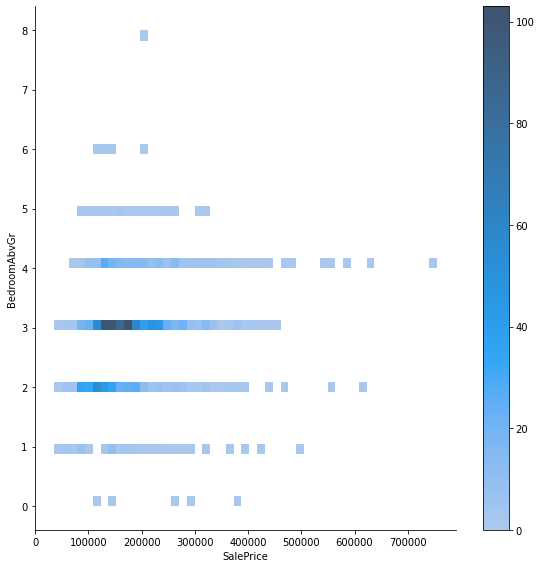

In [35]:
# displot for bivariate
# Note height in inches
sns.displot(data=priceBdrm, x="SalePrice", y="BedroomAbvGr",cbar=True, height=8)

<AxesSubplot:xlabel='SalePrice', ylabel='BedroomAbvGr'>

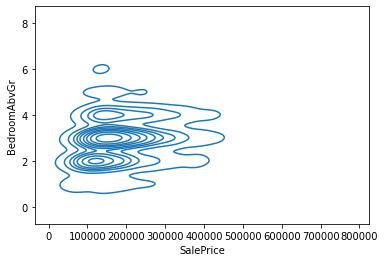

In [27]:
#Use kernel density estimation (kde)
sns.kdeplot(data=priceBdrm, x="SalePrice", y="BedroomAbvGr")

<AxesSubplot:xlabel='SalePrice', ylabel='Probability'>

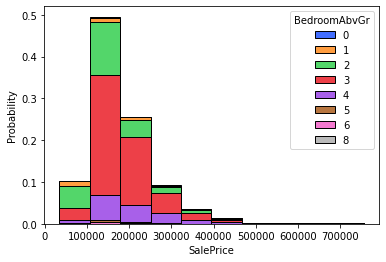

In [41]:
sns.histplot(data=priceBdrm, x="SalePrice", hue='BedroomAbvGr',multiple='stack', bins=10, 
             stat='probability',palette='bright')